This notebook plots the 700hPa R² coefficients of determination of $dT \over dt$ and $dq \over dt$ . These R² coefficients were calculated with the R_2_*.py files found in the repository. The R² coefficients of determination are saved as .npy files in the folder /R_2_val for all evaluated networks. This notebook presents the R² coefficients of VAE (VAE$_{clim \rightarrow clim +conv}$), AE (AED$_{clim \rightarrow clim +conv}$), LR (LR$_{clim \rightarrow clim +conv}$), reference ANN and the two additional evaluated VAEs VAE$_{X \rightarrow Y}$ (VAE$_{climate \rightarrow convection}$) and cVAE. 

In [1]:
import xarray as xr
import numpy as np
import math

import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.image as imag
#from mpl_toolkits.basemap import Basemap
#bm = Basemap()

import pickle

In [2]:


fz = 20
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw



# configuring the colormap

In [3]:
vmin0 = -0.1
vmax0 = 1

In [4]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
def color_map_personalizer(Number_of_Colors):
    cmap = plb.cm.gist_stern
    # extract all colors from the .seismic map
    cmaplist = [cmap(i) for i in np.arange(cmap.N)]
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize
    bounds = np.linspace(vmin0, vmax0, Number_of_Colors)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    return cmap , norm

In [5]:
seism,norm_seism=color_map_personalizer(12)

# Loading Computed R2 values for 700 hPa dT/dt

In [6]:
VAE_clim_clim_conv_R2_dT_700=np.load('R_2_val/VAE_clim_clim_conv_T_tend_R_2_700.npy')
VAE_clim_conv_R2_dT_700=np.load('R_2_val/VAE_clim_conv_T_tend_R_2_700.npy')
CVAE_R2_dT_700=np.load('R_2_val/CVAE_T_tend_R_2_700.npy')
reference_ANN_R2_dT_700=np.load('R_2_val/reference_ANN_T_tend_R_2_700.npy')
LR_clim_clim_conv_R2_dT_700=np.load('R_2_val/LR_clim_clim_conv_T_tend_R_2_700.npy')
AED_clim_clim_conv_R2_dT_700=np.load('R_2_val/AED_clim_clim_conv_T_tend_R_2_700.npy')



lon=np.arange(-180, 180, 360/128)
lat=np.arange(-90, 90, 180/64)

First plots to evaluate the performance of VAEs

Text(0.5, 0.98, 'VAEs dT')

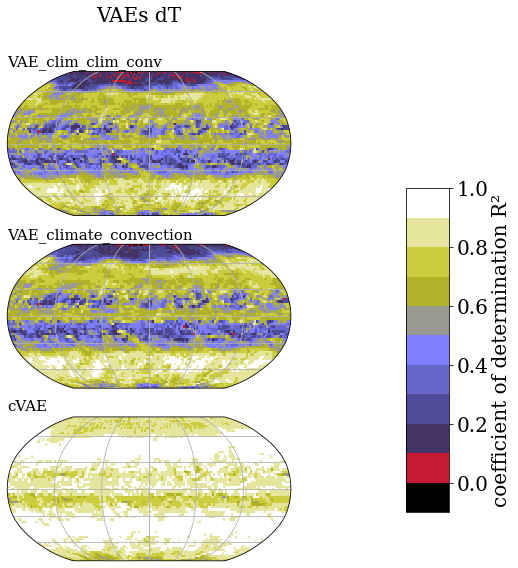

In [7]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(12,9))

for iax in range(3):
    if iax==0: data = VAE_clim_clim_conv_R2_dT_700; tit = 'VAE_clim_clim_conv'
    elif iax==1: data = VAE_clim_conv_R2_dT_700; tit = 'VAE_climate_convection'
    elif iax==2: data = CVAE_R2_dT_700; tit = 'cVAE'

    imag = ax[iax].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[iax].gridlines()
    ax[iax].set_title(tit,loc='left',fontsize=3*fz/4)

    # Colorbar
    if iax==0:
        cbar_ax = fig.add_axes([0.81, 0.20, 0.05, 0.5])
        fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)

fig.suptitle("VAEs dT", fontsize=20)

and reference networks 

Text(0.5, 0.98, 'reference networks dT')

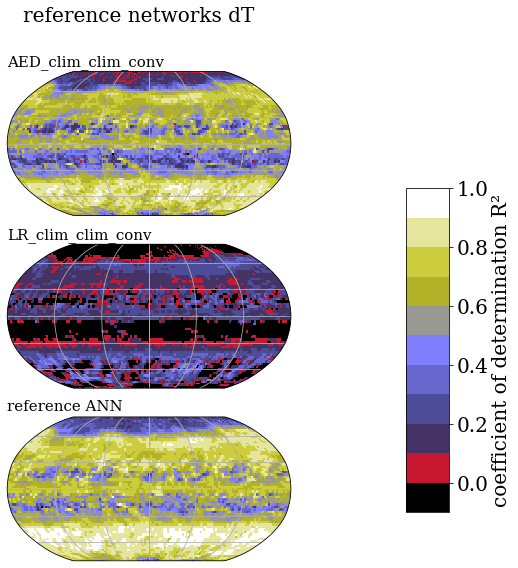

In [8]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(12,9))

for iax in range(3):
    if iax==0: data = AED_clim_clim_conv_R2_dT_700; tit = 'AED_clim_clim_conv'
    elif iax==1: data = LR_clim_clim_conv_R2_dT_700; tit = 'LR_clim_clim_conv'
    elif iax==2: data = reference_ANN_R2_dT_700; tit = 'reference ANN'

    imag = ax[iax].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[iax].gridlines()
    ax[iax].set_title(tit,loc='left',fontsize=3*fz/4)

    # Colorbar
    if iax==0:
        cbar_ax = fig.add_axes([0.81, 0.20, 0.05, 0.5])
        fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)

fig.suptitle("reference networks dT", fontsize=20)

# Load computed R2 values for dq/dt on 700 hPa

In [9]:
VAE_clim_clim_conv_R2_dQ_700=np.load('R_2_val/VAE_clim_clim_conv_Q_tend_R_2_700.npy')
VAE_clim_conv_R2_dQ_700=np.load('R_2_val/VAE_clim_conv_Q_tend_R_2_700.npy')
CVAE_R2_dQ_700=np.load('R_2_val/CVAE_Q_tend_R_2_700.npy')
reference_ANN_R2_dQ_700=np.load('R_2_val/reference_ANN_Q_tend_R_2_700.npy')
LR_clim_clim_conv_R2_dQ_700=np.load('R_2_val/LR_clim_clim_conv_Q_tend_R_2_700.npy')
AED_clim_clim_conv_R2_dQ_700=np.load('R_2_val/AED_clim_clim_conv_Q_tend_R_2_700.npy')



Text(0.5, 0.98, 'VAEs dq')

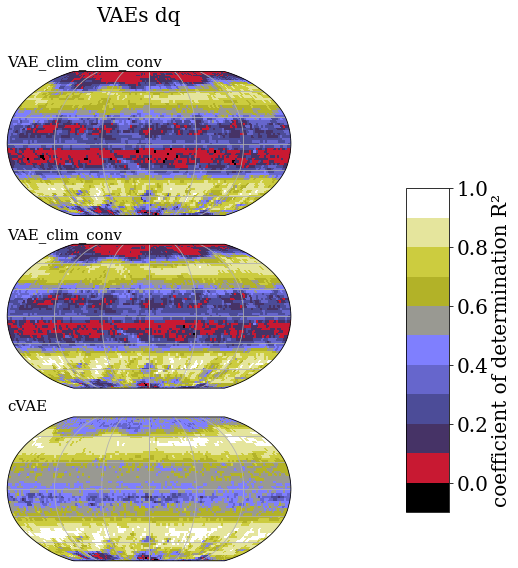

In [10]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(12,9))

for iax in range(3):
    if iax==0: data = VAE_clim_clim_conv_R2_dQ_700; tit = 'VAE_clim_clim_conv'
    elif iax==1: data = VAE_clim_conv_R2_dQ_700; tit = 'VAE_clim_conv'
    elif iax==2: data = CVAE_R2_dQ_700; tit = 'cVAE'

    imag = ax[iax].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[iax].gridlines()
    ax[iax].set_title(tit,loc='left',fontsize=3*fz/4)

    # Colorbar
    if iax==0:
        cbar_ax = fig.add_axes([0.81, 0.20, 0.05, 0.5])
        fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)

fig.suptitle("VAEs dq", fontsize=20)

Text(0.5, 0.98, 'reference networks dq')

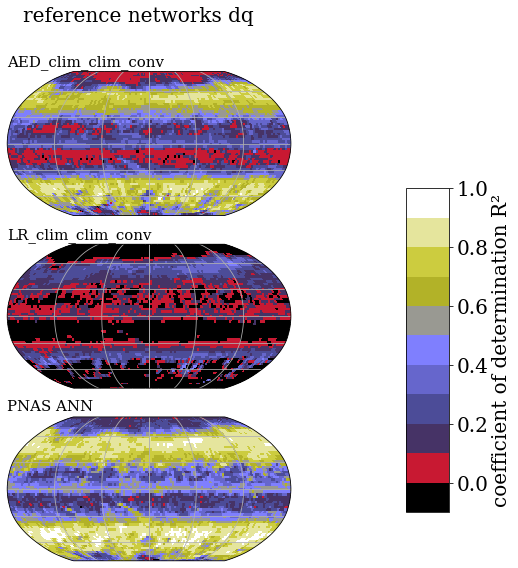

In [11]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(12,9))

for iax in range(3):
    if iax==0: data = AED_clim_clim_conv_R2_dQ_700; tit = 'AED_clim_clim_conv'
    elif iax==1: data = LR_clim_clim_conv_R2_dQ_700; tit = 'LR_clim_clim_conv'
    elif iax==2: data = reference_ANN_R2_dQ_700; tit = 'PNAS ANN';

    imag = ax[iax].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[iax].gridlines()
    ax[iax].set_title(tit,loc='left',fontsize=3*fz/4)

    # Colorbar
    if iax==0:
        cbar_ax = fig.add_axes([0.81, 0.20, 0.05, 0.5])
        fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)

fig.suptitle("reference networks dq", fontsize=20)

# Plotting of R2 values for all networks

0
0
1
1
0
1
2
0
1


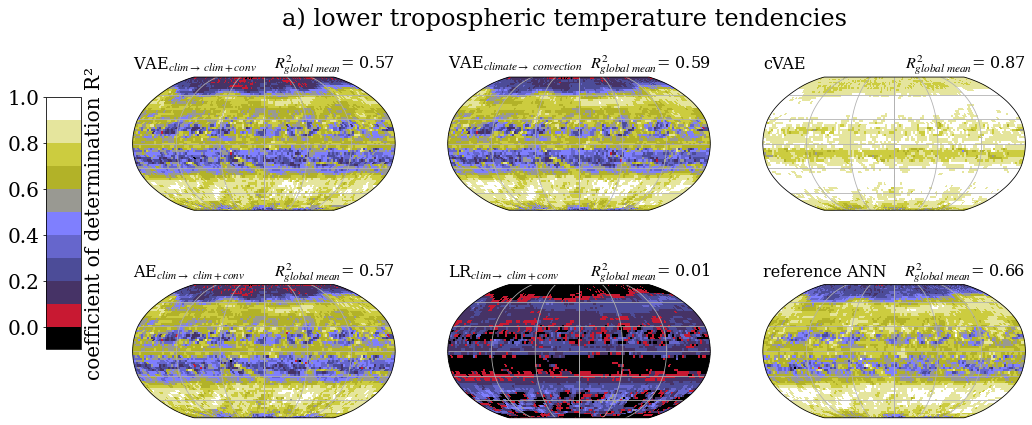

In [13]:
fig, ax = plt.subplots(2,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,7))

for isub in range(0,3): # Loop over 6 subplots
    #print(isub)
    isub0 = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    print(isub0)
    for iax in range(2): # loop over VAEs in first and ref networks in second row
        
        if iax==0: 
            
            if isub0==0:
                data = VAE_clim_clim_conv_R2_dT_700;
                tit = r'VAE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dT_700)),2));
            elif isub0==1:
                data = VAE_clim_conv_R2_dT_700;
                tit = r'VAE$_{climate \rightarrow \ convection}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_conv_R2_dT_700)),2));
                
            if isub0==2:
                data = CVAE_R2_dT_700;
                tit = 'cVAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(CVAE_R2_dT_700)),2));
                
                
                
        if iax==1: 
            
            if isub0==0: 
                data = AED_clim_clim_conv_R2_dT_700;
                tit = r'AE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dT_700)),2));

                
            elif isub0==1:
                data = LR_clim_clim_conv_R2_dT_700;
                tit = r'LR$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dT_700)),2));

            if isub0==2:
                data = reference_ANN_R2_dT_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dT_700)),2));

                
        iax7 = iax+3*math.floor(isub/3) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=16)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=16)


        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes([0.05, 0.30, 0.03, 0.5])
            fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            
    fig.suptitle("a) lower tropospheric temperature tendencies", fontsize=24)

same plot as above but with modified nomenclature

0
0
1
1
0
1
2
0
1


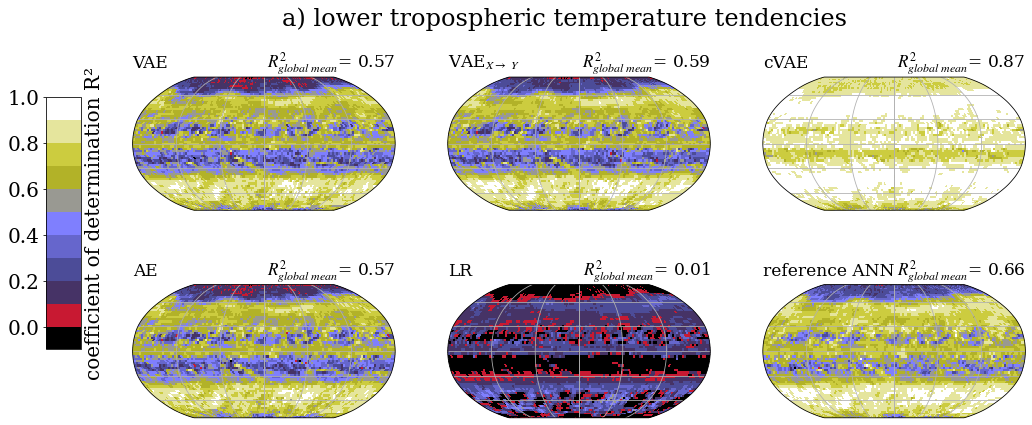

In [14]:
fig, ax = plt.subplots(2,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,7))

for isub in range(0,3): # Loop over 6 subplots
    #print(isub)
    isub0 = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    print(isub0)
    for iax in range(2): 
        
        if iax==0: 
            
            if isub0==0:
                data = VAE_clim_clim_conv_R2_dT_700;
                tit = 'VAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dT_700)),2));
            elif isub0==1:
                data = VAE_clim_conv_R2_dT_700;
                tit = r'VAE$_{X \rightarrow \ Y}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_conv_R2_dT_700)),2));
                
            if isub0==2:
                data = CVAE_R2_dT_700;
                tit = 'cVAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(CVAE_R2_dT_700)),2));
                
                
                
        if iax==1: 
            
            if isub0==0: 
                data = AED_clim_clim_conv_R2_dT_700;
                tit = 'AE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dT_700)),2));

                
            elif isub0==1:
                data = LR_clim_clim_conv_R2_dT_700;
                tit = 'LR';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dT_700)),2));

            if isub0==2:
                data = reference_ANN_R2_dT_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dT_700)),2));

                
        iax7 = iax+3*math.floor(isub/3) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=17)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=17)


        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes([0.05, 0.30, 0.03, 0.5])
            fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            
    fig.suptitle("a) lower tropospheric temperature tendencies", fontsize=24)

The next plots show the R2 value for 700 hPa dq/dt

0
0
1
1
0
1
2
0
1


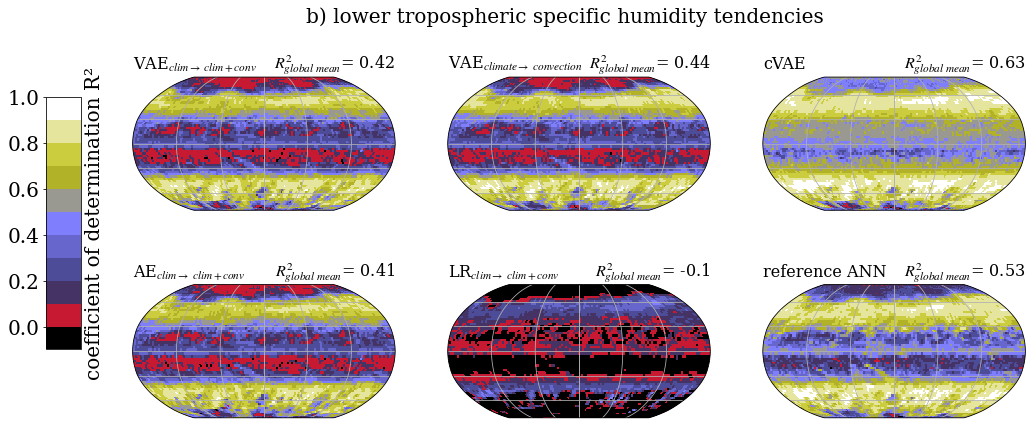

In [15]:
fig, ax = plt.subplots(2,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,7))

for isub in range(0,3): #six subplots
    #print(isub)
    isub0 = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    print(isub0)
    for iax in range(2): 
        
        if iax==0: 
            
            if isub0==0:
                data = VAE_clim_clim_conv_R2_dQ_700;
                tit = r'VAE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dQ_700)),2));
            elif isub0==1:
                data = VAE_clim_conv_R2_dQ_700;
                tit = r'VAE$_{climate \rightarrow \ convection}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_conv_R2_dQ_700)),2));
                
            if isub0==2:
                data = CVAE_R2_dQ_700;
                tit = 'cVAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(CVAE_R2_dQ_700)),2));
                
                
                
        if iax==1: 
            
            if isub0==0: 
                data = AED_clim_clim_conv_R2_dQ_700;
                tit = r'AE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dQ_700)),2));

                
            elif isub0==1:
                data = LR_clim_clim_conv_R2_dQ_700;
                tit = r'LR$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dQ_700)),2));

            if isub0==2:
                data = reference_ANN_R2_dQ_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dQ_700)),2));

                
        iax7 = iax+3*math.floor(isub/3) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=16)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=16)

        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes([0.05, 0.30, 0.03, 0.5])
            fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            
    fig.suptitle("b) lower tropospheric specific humidity tendencies", fontsize=20)

0
0
1
1
0
1
2
0
1


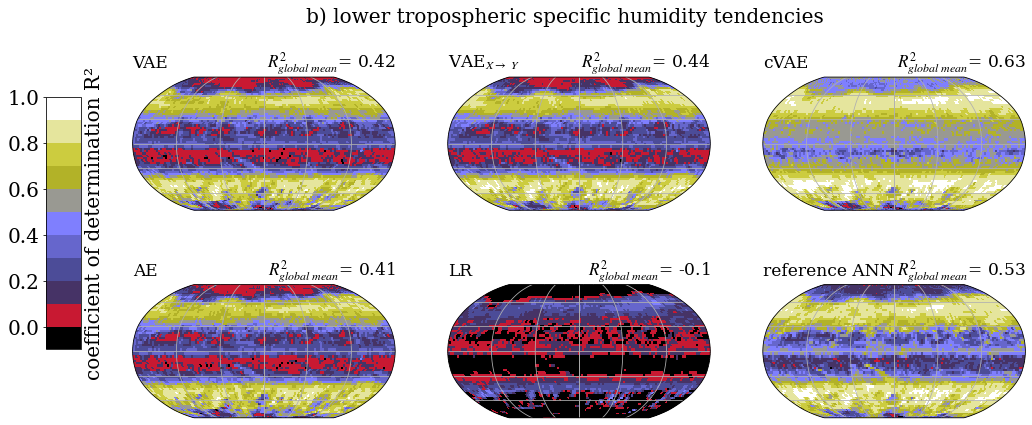

In [16]:
fig, ax = plt.subplots(2,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,7))

for isub in range(0,3): #six subplots
    #print(isub)
    isub0 = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    print(isub0)
    for iax in range(2): 
        
        if iax==0: 
            
            if isub0==0:
                data = VAE_clim_clim_conv_R2_dQ_700;
                tit = 'VAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dQ_700)),2));
            elif isub0==1:
                data = VAE_clim_conv_R2_dQ_700;
                tit = r'VAE$_{X \rightarrow \ Y}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_conv_R2_dQ_700)),2));
                
            if isub0==2:
                data = CVAE_R2_dQ_700;
                tit = 'cVAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(CVAE_R2_dQ_700)),2));
                
                
                
        if iax==1: 
            
            if isub0==0: 
                data = AED_clim_clim_conv_R2_dQ_700;
                tit = 'AE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dQ_700)),2));

                
            elif isub0==1:
                data = LR_clim_clim_conv_R2_dQ_700;
                tit = 'LR';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dQ_700)),2));

            if isub0==2:
                data = reference_ANN_R2_dQ_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dQ_700)),2));

                
        iax7 = iax+3*math.floor(isub/3) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=17)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=17)

        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes([0.05, 0.30, 0.03, 0.5])
            fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            
    fig.suptitle("b) lower tropospheric specific humidity tendencies", fontsize=20)

# Plots without conditional VAE

0
0
1
1
0
1
2
0
1


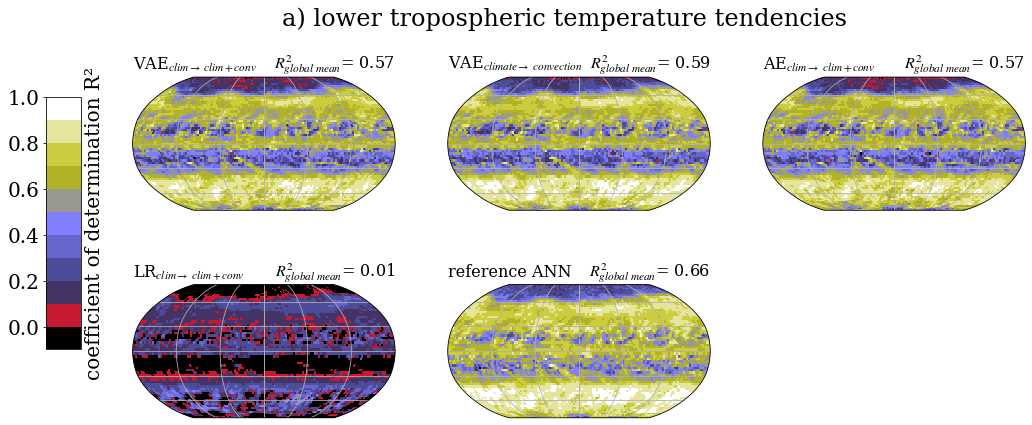

In [17]:
fig, ax = plt.subplots(2,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,7))

for isub in range(0,3): # Loop over 6 subplots
    #print(isub)
    isub0 = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    print(isub0)
    for iax in range(2): 
        
        if iax==0: 
            
            if isub0==0:
                data = VAE_clim_clim_conv_R2_dT_700;
                tit = r'VAE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dT_700)),2));
            elif isub0==1:
                data = VAE_clim_conv_R2_dT_700;
                tit = r'VAE$_{climate \rightarrow \ convection}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_conv_R2_dT_700)),2));
            if isub0==2:
                data = AED_clim_clim_conv_R2_dT_700;
                tit = r'AE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dT_700)),2));

                
        if iax==1: 
            
            if isub0==0:
                data = LR_clim_clim_conv_R2_dT_700;
                tit = r'LR$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dT_700)),2));

            if isub0==1:
                data = reference_ANN_R2_dT_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dT_700)),2));

                
        iax7 = iax+3*math.floor(isub/3) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=16)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=16)

        
        if isub==2 and iax==1:
        
            fig.delaxes(ax.flatten()[5]) #leaves subplot 6 empty 

            
            

        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes([0.05, 0.30, 0.03, 0.5])
            fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            
    fig.suptitle("a) lower tropospheric temperature tendencies", fontsize=24)

0
0
1
1
0
1
2
0
1


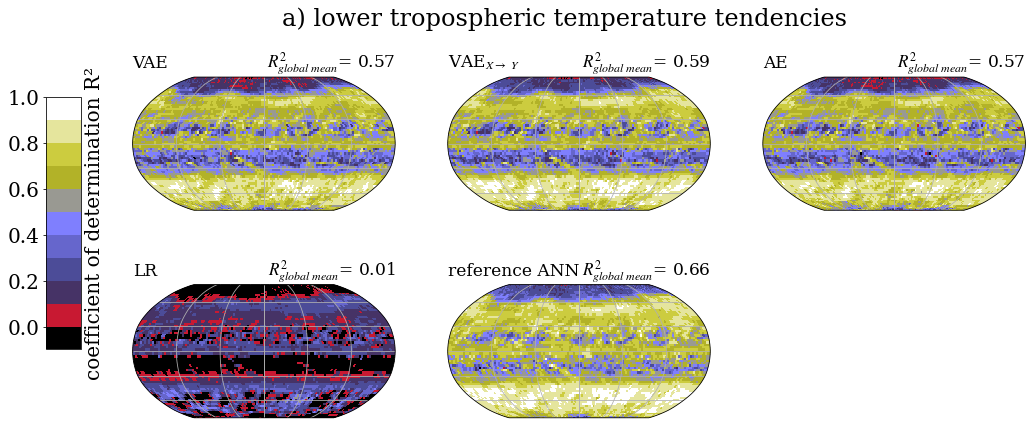

In [18]:
fig, ax = plt.subplots(2,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,7))

for isub in range(0,3): # Loop over 6 subplots
    #print(isub)
    isub0 = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    print(isub0)
    for iax in range(2): 
        
        if iax==0: 
            
            if isub0==0:
                data = VAE_clim_clim_conv_R2_dT_700;
                tit = 'VAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dT_700)),2));
            elif isub0==1:
                data = VAE_clim_conv_R2_dT_700;
                tit = r'VAE$_{X \rightarrow \ Y}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_conv_R2_dT_700)),2));
            if isub0==2:
                data = AED_clim_clim_conv_R2_dT_700;
                tit = 'AE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dT_700)),2));

                
        if iax==1: 
            
            if isub0==0:
                data = LR_clim_clim_conv_R2_dT_700;
                tit = 'LR';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dT_700)),2));

            if isub0==1:
                data = reference_ANN_R2_dT_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dT_700)),2));

                
        iax7 = iax+3*math.floor(isub/3) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=17)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=17)

        
        if isub==2 and iax==1:
        
            fig.delaxes(ax.flatten()[5]) # leaves subplot 6 empty

            
            

        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes([0.05, 0.30, 0.03, 0.5])
            fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            
    fig.suptitle("a) lower tropospheric temperature tendencies", fontsize=24)

0
0
1
1
0
1
2
0
1


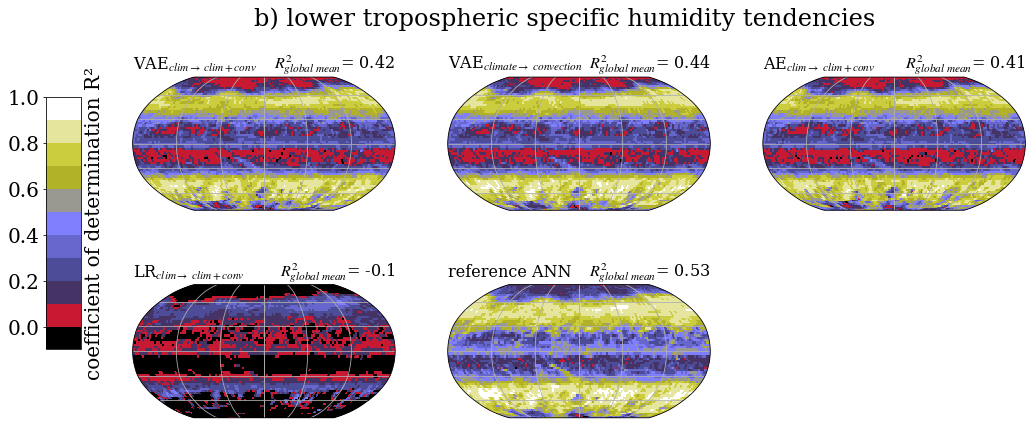

In [19]:
fig, ax = plt.subplots(2,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,7))

for isub in range(0,3): # Loop over 6 subplots
    #print(isub)
    isub0 = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    print(isub0)
    for iax in range(2): 
        
        if iax==0: 
            
            if isub0==0:
                data = VAE_clim_clim_conv_R2_dQ_700;
                tit = r'VAE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dQ_700)),2));
            elif isub0==1:
                data = VAE_clim_conv_R2_dQ_700;
                tit = r'VAE$_{climate \rightarrow \ convection}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_conv_R2_dQ_700)),2));

            if isub0==2:
                data = AED_clim_clim_conv_R2_dQ_700;
                tit = r'AE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dQ_700)),2));

                
        if iax==1: 
            
            if isub0==0:
                data = LR_clim_clim_conv_R2_dQ_700;
                tit = r'LR$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dQ_700)),2));

            if isub0==1:
                data = reference_ANN_R2_dQ_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dQ_700)),2));

                
        iax7 = iax+3*math.floor(isub/3) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=16)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=16)

        
        if isub==2 and iax==1:
        
            fig.delaxes(ax.flatten()[5])

            
            

        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes([0.05, 0.30, 0.03, 0.5])
            fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            
    fig.suptitle("b) lower tropospheric specific humidity tendencies", fontsize=24)

0
0
1
1
0
1
2
0
1


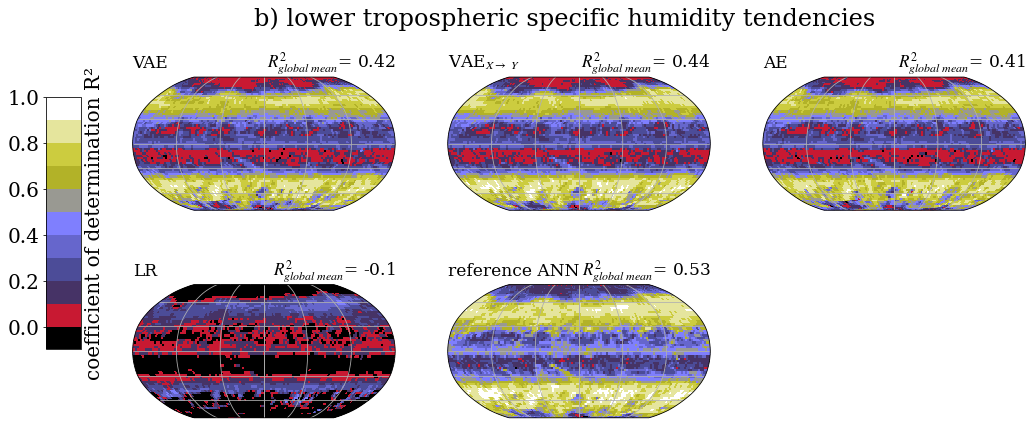

In [20]:
fig, ax = plt.subplots(2,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,7))

for isub in range(0,3): # Loop over 6 subplots
    #print(isub)
    isub0 = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    print(isub0)
    for iax in range(2):
        
        if iax==0: 
            
            if isub0==0:
                data = VAE_clim_clim_conv_R2_dQ_700;
                tit = 'VAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dQ_700)),2));
            elif isub0==1:
                data = VAE_clim_conv_R2_dQ_700;
                tit = r'VAE$_{X \rightarrow \ Y}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_conv_R2_dQ_700)),2));

            if isub0==2:
                data = AED_clim_clim_conv_R2_dQ_700;
                tit = 'AE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dQ_700)),2));

                
        if iax==1: 
            
            if isub0==0:
                data = LR_clim_clim_conv_R2_dQ_700;
                tit = 'LR';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dQ_700)),2));

            if isub0==1:
                data = reference_ANN_R2_dQ_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dQ_700)),2));

                
        iax7 = iax+3*math.floor(isub/3) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=17)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=17)

        
        if isub==2 and iax==1:
        
            fig.delaxes(ax.flatten()[5])

            
            

        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes([0.05, 0.30, 0.03, 0.5])
            fig.colorbar(imag, label="coefficient of determination R²", cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            
    fig.suptitle("b) lower tropospheric specific humidity tendencies", fontsize=24)

# Plots for VAE, AE, LR and reference ANN

0
0
1
1
0
1


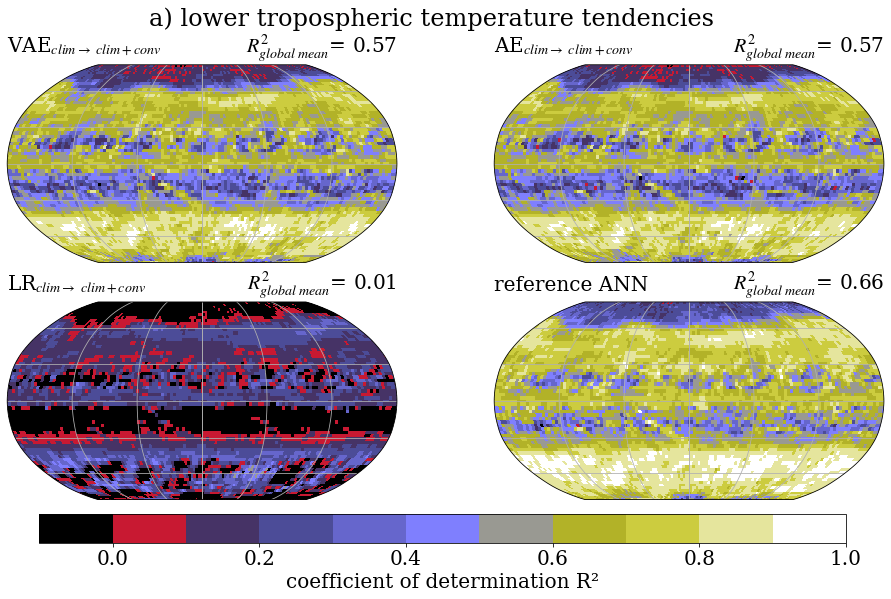

In [21]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,8))

for isub in range(0,2): # Loop over 4 subplots
    #print(isub)
    isub0 = isub-2*math.floor(isub/2) # Determine location of subplot (out of 4)
    print(isub0)
    for iax in range(2): # 
        
        if iax==0: 
            
            if isub0==0: 
                data = VAE_clim_clim_conv_R2_dT_700;
                tit = r'VAE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dT_700)),2));

            if isub0==1:
                data = AED_clim_clim_conv_R2_dT_700;
                tit = r'AE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dT_700)),2));

                
        if iax==1: 
            
            if isub0==0:
                data = LR_clim_clim_conv_R2_dT_700;
                tit = r'LR$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dT_700)),2));

                
            if isub0==1:
                data = reference_ANN_R2_dT_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dT_700)),2));

                
        iax7 = iax+2*math.floor(isub/2) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=fz)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=fz)

             
            
        # Colorbar
        if isub==1 and iax==1:
            cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
            fig.colorbar(imag, label="coefficient of determination R²",orientation='horizontal', cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('right')
            
    fig.suptitle("a) lower tropospheric temperature tendencies", fontsize=24)

0
0
1
1
0
1


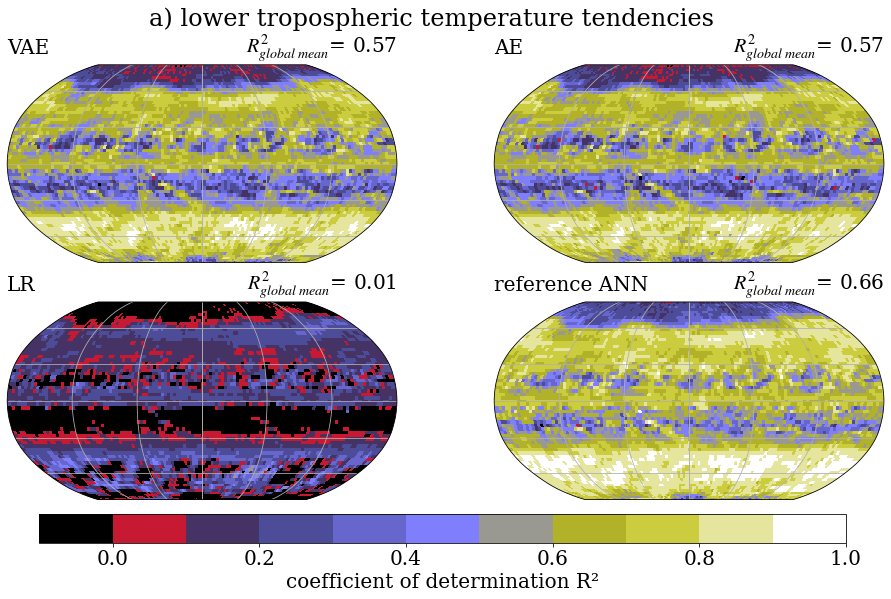

In [22]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,8))

for isub in range(0,2): # Loop over 4 subplots
    #print(isub)
    isub0 = isub-2*math.floor(isub/2) # Determine location of subplot (out of 4)
    print(isub0)
    for iax in range(2): 
        
        if iax==0: 
            
            if isub0==0: 
                data = VAE_clim_clim_conv_R2_dT_700;
                tit = 'VAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dT_700)),2));

            if isub0==1:
                data = AED_clim_clim_conv_R2_dT_700;
                tit = 'AE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dT_700)),2));

                
        if iax==1: 
            
            if isub0==0:
                data = LR_clim_clim_conv_R2_dT_700;
                tit = 'LR';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dT_700)),2));

                
            if isub0==1:
                data = PNAS_ANN_R2_dT_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(PNAS_ANN_R2_dT_700)),2));

                
        iax7 = iax+2*math.floor(isub/2) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=fz)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=fz)

             
            
        # Colorbar
        if isub==1 and iax==1:
            cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
            fig.colorbar(imag, label="coefficient of determination R²",orientation='horizontal', cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('right')
            
    fig.suptitle("a) lower tropospheric temperature tendencies", fontsize=24)

0
0
1
1
0
1


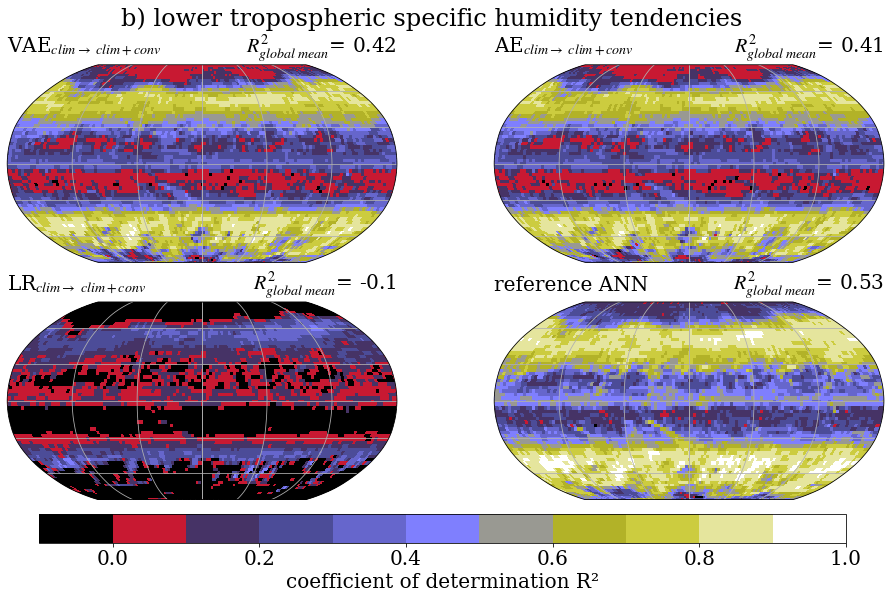

In [22]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,8))

for isub in range(0,2): # Loop over 4 subplots
    #print(isub)
    isub0 = isub-2*math.floor(isub/2) # Determine location of subplot (out of 4)
    print(isub0)
    for iax in range(2):
        
        if iax==0: 
            
            if isub0==0: 
                data = VAE_clim_clim_conv_R2_dQ_700;
                tit = r'VAE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dQ_700)),2));

            if isub0==1:
                data = AED_clim_clim_conv_R2_dQ_700;
                tit = r'AE$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dQ_700)),2));

                
        if iax==1: 
            
            if isub0==0:
                data = LR_clim_clim_conv_R2_dQ_700;
                tit = r'LR$_{clim \rightarrow \ clim+conv}$';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dQ_700)),2));

                
            if isub0==1:
                data = reference_ANN_R2_dQ_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dQ_700)),2));

                
        iax7 = iax+2*math.floor(isub/2) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=fz)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=fz)

             
            
        # Colorbar
        if isub==1 and iax==1:
            cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
            fig.colorbar(imag, label="coefficient of determination R²",orientation='horizontal', cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('right')
            
    fig.suptitle("b) lower tropospheric specific humidity tendencies", fontsize=24)

0
0
1
1
0
1


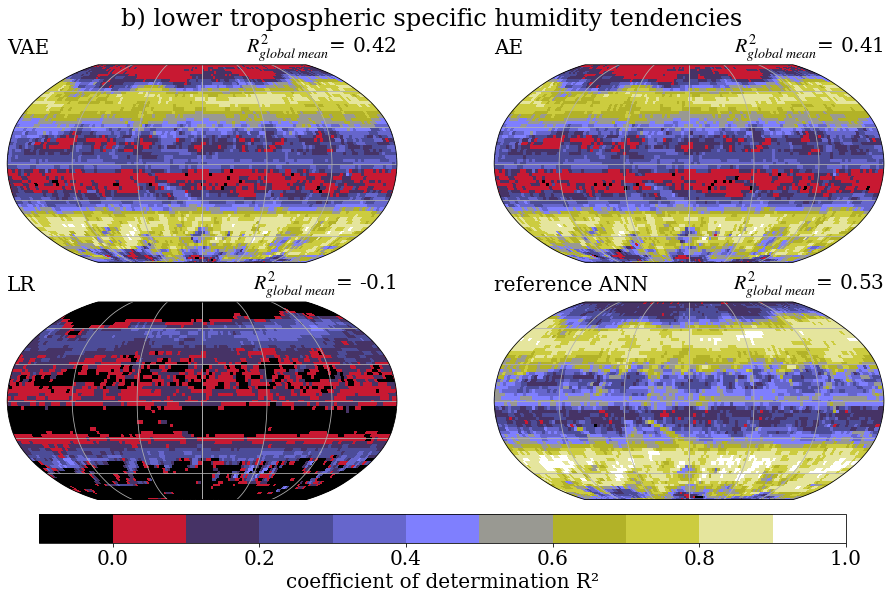

In [23]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,8))

for isub in range(0,2): # Loop over 4 subplots
    #print(isub)
    isub0 = isub-2*math.floor(isub/2) # Determine location of subplot (out of 4)
    print(isub0)
    for iax in range(2): 
        
        if iax==0: 
            
            if isub0==0: 
                data = VAE_clim_clim_conv_R2_dQ_700;
                tit = 'VAE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dQ_700)),2));

            if isub0==1:
                data = AED_clim_clim_conv_R2_dQ_700;
                tit = 'AE';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(AED_clim_clim_conv_R2_dQ_700)),2));

                
        if iax==1: 
            
            if isub0==0:
                data = LR_clim_clim_conv_R2_dQ_700;
                tit = 'LR';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(LR_clim_clim_conv_R2_dQ_700)),2));

                
            if isub0==1:
                data = reference_ANN_R2_dQ_700;
                tit = 'reference ANN';
                tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dQ_700)),2));

                
        iax7 = iax+2*math.floor(isub/2) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
        ax[iax7][isub].gridlines()
        ax[iax7][isub].set_title(tit,loc='left',fontsize=fz)
        ax[iax7][isub].set_title(tit_2,loc='right',fontsize=fz)

             
            
        # Colorbar
        if isub==1 and iax==1:
            cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
            fig.colorbar(imag, label="coefficient of determination R²",orientation='horizontal', cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('right')
            
    fig.suptitle("b) lower tropospheric specific humidity tendencies", fontsize=24)

# Focus on VAE vs  reference ANN  (Figure 3a in paper)

0
1


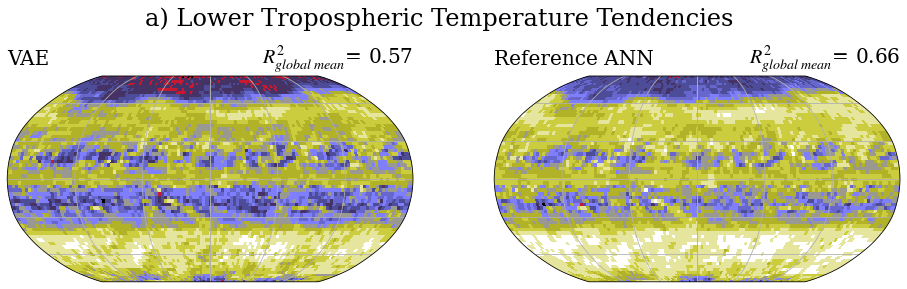

In [25]:
fig, ax = plt.subplots(1,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,5))

for isub in range(0,2): # Loop over 6 subplots
    print(isub)
  
        
     
            
    if isub==0:
        data = VAE_clim_clim_conv_R2_dT_700;
        tit = r'VAE';
        tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dT_700)),2));
    if isub==1:
        data = reference_ANN_R2_dT_700;
        tit = r'Reference ANN';
        tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dT_700)),2));
                
        
    imag = ax[isub].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[isub].gridlines()
    ax[isub].set_title(tit,loc='left',fontsize=fz)
    ax[isub].set_title(tit_2,loc='right',fontsize=fz)
             
            
        # Colorbar
        #if isub==1:
        #    cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.05])
        #    fig.colorbar(imag, label="coefficient of determination R²",orientation='horizontal', cax=cbar_ax)
        #    cbar_ax.yaxis.set_ticks_position('right')
            
    fig.suptitle("a) Lower Tropospheric Temperature Tendencies", fontsize=24)

0
1


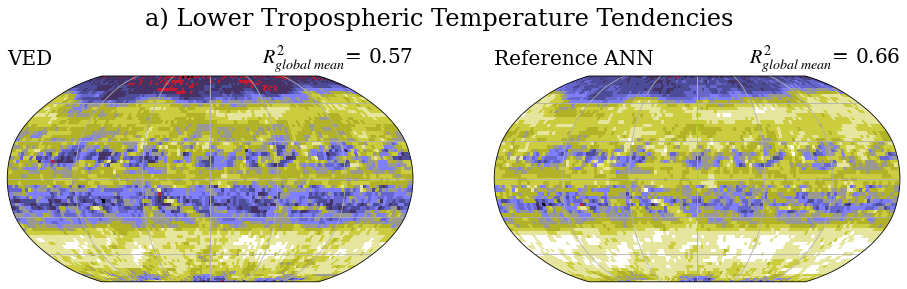

In [7]:
#changed nomenclature VAE --> VED
fig, ax = plt.subplots(1,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,5))

for isub in range(0,2): # Loop over 6 subplots
    print(isub)
  
        
     
            
    if isub==0:
        data = VAE_clim_clim_conv_R2_dT_700;
        tit = r'VED';
        tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dT_700)),2));
    if isub==1:
        data = reference_ANN_R2_dT_700;
        tit = r'Reference ANN';
        tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dT_700)),2));
                
        
    imag = ax[isub].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[isub].gridlines()
    ax[isub].set_title(tit,loc='left',fontsize=fz)
    ax[isub].set_title(tit_2,loc='right',fontsize=fz)
             
            
        # Colorbar
        #if isub==1:
        #    cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.05])
        #    fig.colorbar(imag, label="coefficient of determination R²",orientation='horizontal', cax=cbar_ax)
        #    cbar_ax.yaxis.set_ticks_position('right')
            
    fig.suptitle("a) Lower Tropospheric Temperature Tendencies", fontsize=24)

# Figure 3b in paper

0
1


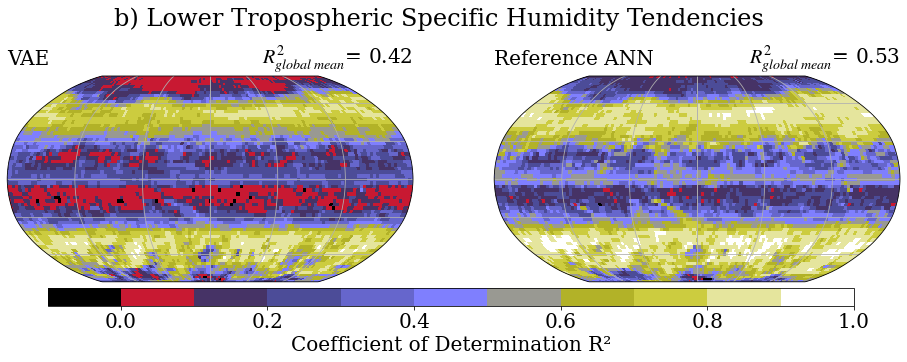

In [31]:
fig, ax = plt.subplots(1,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,5))

for isub in range(0,2): # Loop over 6 subplots
    print(isub)
  
        
     
            
    if isub==0:
        data = VAE_clim_clim_conv_R2_dQ_700;
        tit = r'VAE';
        tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dQ_700)),2));
    if isub==1:
        data = reference_ANN_R2_dQ_700;
        tit = r'Reference ANN';
        tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dQ_700)),2));
                
        
    imag = ax[isub].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[isub].gridlines()
    ax[isub].set_title(tit,loc='left',fontsize=fz)
    ax[isub].set_title(tit_2,loc='right',fontsize=fz)
         
            
    # Colorbar
    if isub==1:
        cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.05])
        fig.colorbar(imag, label="Coefficient of Determination R²",orientation='horizontal', cax=cbar_ax)
        cbar_ax.yaxis.set_ticks_position('right')
            
    fig.suptitle("b) Lower Tropospheric Specific Humidity Tendencies", fontsize=24)

0
1


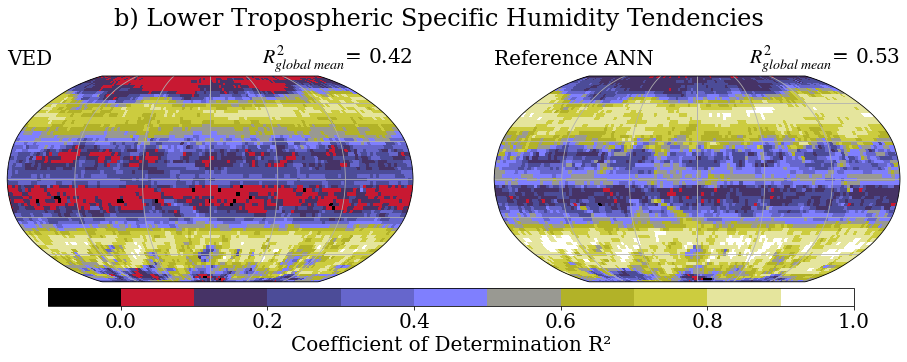

In [10]:
fig, ax = plt.subplots(1,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(16,5))

for isub in range(0,2): # Loop over 6 subplots
    print(isub)
  
        
     
            
    if isub==0:
        data = VAE_clim_clim_conv_R2_dQ_700;
        tit = r'VED';
        tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(VAE_clim_clim_conv_R2_dQ_700)),2));
    if isub==1:
        data = reference_ANN_R2_dQ_700;
        tit = r'Reference ANN';
        tit_2=r'$R^2_{global \ mean}$= '+ str( np.round(np.mean(np.mean(reference_ANN_R2_dQ_700)),2));
                
        
    imag = ax[isub].pcolormesh(lon, lat, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[isub].gridlines()
    ax[isub].set_title(tit,loc='left',fontsize=fz)
    ax[isub].set_title(tit_2,loc='right',fontsize=fz)
         
            
    # Colorbar
    if isub==1:
        cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.05])
        fig.colorbar(imag, label="Coefficient of Determination R²",orientation='horizontal', cax=cbar_ax)
        cbar_ax.yaxis.set_ticks_position('right')
            
    fig.suptitle("b) Lower Tropospheric Specific Humidity Tendencies", fontsize=24)

# Further checks of VAE vs reference ANN of entire vertical profiles of dT/dt and dq/dt

In [27]:
from cbrain.imports import *

PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];


In [28]:
reference_ANN_dT_global=np.load('R_2_val/reference_ANN_T_tend_R_2_glob.npy')
reference_ANN_dT_global_mean=np.load('R_2_val/reference_ANN_T_tend_R_2_glob_mean.npy')
VAE_clim_clim_conv_dT_global=np.load('R_2_val/VAE_clim_clim_conv_T_tend_R_2_glob.npy')
VAE_clim_clim_conv_dT_global_mean=np.load('R_2_val/VAE_clim_clim_conv_T_tend_R_2_glob_mean.npy')
reference_ANN_dQ_global=np.load('R_2_val/reference_ANN_Q_tend_R_2_glob.npy')
reference_ANN_dQ_global_mean=np.load('R_2_val/reference_ANN_Q_tend_R_2_glob_mean.npy')
VAE_clim_clim_conv_dQ_global=np.load('R_2_val/VAE_clim_clim_conv_Q_tend_R_2_glob.npy')
VAE_clim_clim_conv_dQ_global_mean=np.load('R_2_val/VAE_clim_clim_conv_Q_tend_R_2_glob_mean.npy')


Text(0.5, 1.0, 'Specific Humidity Tendency')

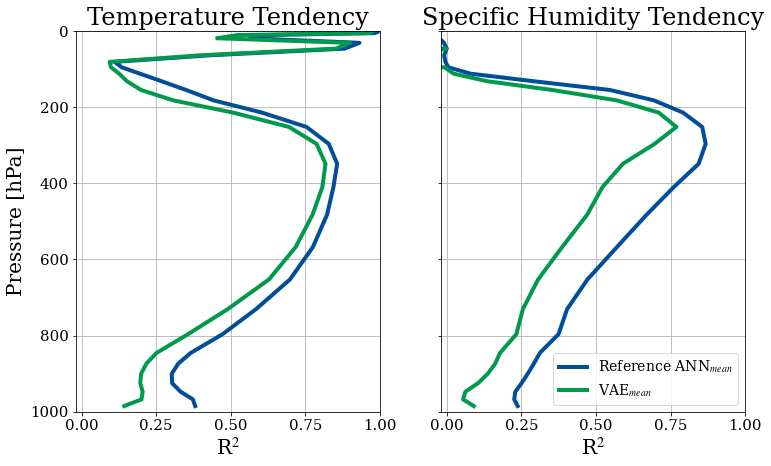

In [29]:
## mean R² profiles computed based on mean of true variances and sum over squared errors for dT/dt and dq/dt
plt.figure(1,(12,7))

plt.subplot(1,2,1)
plt.plot(reference_ANN_dT_global_mean,P[0:30]/100,color=[0,0.3,0.6],label=r'Reference ANN$_{mean}$')
plt.plot(VAE_clim_clim_conv_dT_global_mean,P[0:30]/100,color=[0,0.6,0.3],label=r'VAE$_{mean}$')
sr=plt.gca()
plt.xlim(-0.02,1)
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)
plt.ylabel('Pressure [hPa]')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'R$^2$')
plt.title('Temperature Tendency')


ax_2=plt.subplot(1,2,2)
plt.plot(reference_ANN_dQ_global_mean,P[0:30]/100,color=[0,0.3,0.6],label=r'Reference ANN$_{mean}$')
plt.plot(VAE_clim_clim_conv_dQ_global_mean,P[0:30]/100,color=[0,0.6,0.3],label=r'VAE$_{mean}$')
sr=plt.gca()
plt.xlim(-0.02,1)
plt.ylim(0,1000)

plt.xticks(fontsize=15)
ax_2.set_yticklabels([])
sr.invert_yaxis()
plt.grid(True)
plt.xlabel(r'R$^2$')

plt.legend(loc=4,fontsize=14)
plt.title('Specific Humidity Tendency')


Text(0.5, 1.0, 'Specific Humidity Tendency')

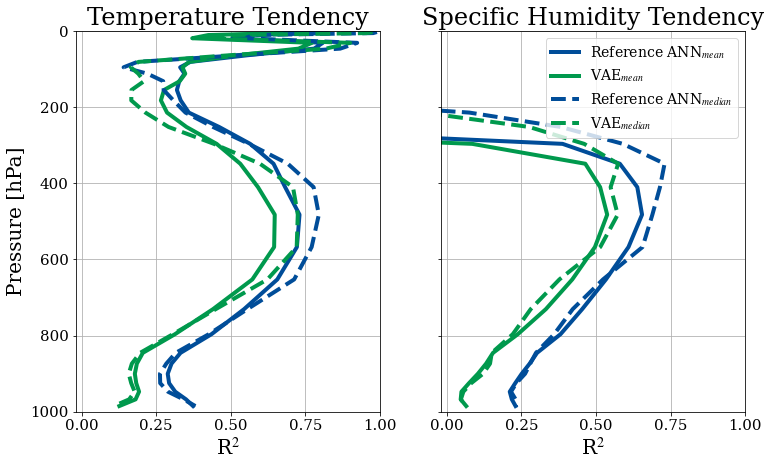

In [30]:
## mean and median R² of 3D R² fields(lat,lon,lev) computed based on true variance and sum over squared errors in each grid cell 

plt.figure(1,(12,7))
plt.subplot(1,2,1)
plt.plot(np.mean(np.mean(reference_ANN_dT_global,1),0),P[0:30]/100,color=[0,0.3,0.6],label=r'Reference ANN$_{mean}$')
plt.plot(np.mean(np.mean(VAE_clim_clim_conv_dT_global,1),0),P[0:30]/100,color=[0,0.6,0.3],label=r'VAE$_{mean}$')
plt.plot(np.median(np.median(reference_ANN_dT_global,1),0),P[0:30]/100,'--',color=[0,0.3,0.6],label=r'Reference ANN$_{median}$')
plt.plot(np.median(np.median(VAE_clim_clim_conv_dT_global,1),0),P[0:30]/100,'--',color=[0,0.6,0.3],label=r'VAE$_{median}$')
sr=plt.gca()
plt.xlim(-0.02,1)
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)
plt.ylabel('Pressure [hPa]')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'R$^2$')
plt.title('Temperature Tendency')


ax_2=plt.subplot(1,2,2)
plt.plot(np.mean(np.mean(reference_ANN_dQ_global,1),0),P[0:30]/100,color=[0,0.3,0.6],label=r'Reference ANN$_{mean}$')
plt.plot(np.mean(np.mean(VAE_clim_clim_conv_dQ_global,1),0),P[0:30]/100,color=[0,0.6,0.3],label=r'VAE$_{mean}$')
plt.plot(np.median(np.median(reference_ANN_dQ_global,1),0),P[0:30]/100,'--',color=[0,0.3,0.6],label=r'Reference ANN$_{median}$')
plt.plot(np.median(np.median(VAE_clim_clim_conv_dQ_global,1),0),P[0:30]/100,'--',color=[0,0.6,0.3],label=r'VAE$_{median}$')
sr=plt.gca()
plt.xlim(-0.02,1)
plt.ylim(0,1000)

plt.xticks(fontsize=15)
ax_2.set_yticklabels([])
sr.invert_yaxis()
plt.grid(True)
plt.xlabel(r'R$^2$')

plt.legend(loc=1,fontsize=14)
plt.title('Specific Humidity Tendency')
